<a href="https://colab.research.google.com/github/Olga-1911/Developing_a_fully_connected_neural_network/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B8_%D0%9B%D0%B0%D0%B1_%D1%80%D0%B0%D0%B1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа № 4**

Для выполнения лабораторной работы № 4 я выбрала задачу классификации текстов (анализ настроений на наборе данных IMDB), так как это стандартная задача для RNN.

Произведем разработку, обучение и тестирование следующих моделей:
1. Модель SimpleRNN (Simple Recurrent Neural Network)  – простая рекуррентная нейронная сеть, это базовый тип рекуррентной нейронной сети (RNN). Её главная особенность в том, что она обрабатывает последовательности данных, учитывая предыдущие элементы последовательности.
2. Модель LSTM (Long Short-Term Memory) – долгая краткосрочная память, это более продвинутый тип рекуррентной нейронной сети, разработанный для решения проблемы затухающего градиента, которая возникает в SimpleRNN.
3. Модель GRU (Gated Recurrent Unit) – блок с управляемым состоянием, это своего рода упрощенная версия LSTM (Long Short-Term Memory). Она была разработана как альтернатива LSTM, чтобы уменьшить вычислительные затраты и упростить архитектуру, сохраняя при этом способность обрабатывать длинные последовательности данных.

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [24]:
# Параметры
max_features = 10000  # Количество слов в словаре
maxlen = 500  # Максимальная длина последовательности
batch_size = 32
epochs = 5

In [25]:
# Загрузка и предобработка данных
print("Загрузка данных IMDB...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

Загрузка данных IMDB...


**1: Обучение `SimpleRNN`**

In [26]:
# 1.1. Разработка архитектуры SimpleRNN
def build_simple_rnn():
    model = Sequential([
        Embedding(max_features, 128, input_length=maxlen),
        SimpleRNN(64, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [27]:
# 1.2. Обучение модели SimpleRNN
print("\nОбучение модели SimpleRNN...")
simple_rnn_model = build_simple_rnn()
history_simple_rnn = simple_rnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                                           validation_data=(x_test, y_test), verbose=1)


Обучение модели SimpleRNN...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 205ms/step - accuracy: 0.6200 - loss: 0.6373 - val_accuracy: 0.6448 - val_loss: 0.6141
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 212s 218ms/step - accuracy: 0.7800 - loss: 0.4667 - val_accuracy: 0.7933 - val_loss: 0.4695
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 218ms/step - accuracy: 0.9012 - loss: 0.2555 - val_accuracy: 0.7586 - val_loss: 0.5585
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 216ms/step - accuracy: 0.9533 - loss: 0.1326 - val_accuracy: 0.7666 - val_loss: 0.6260
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 217ms/step - accuracy: 0.9722 - loss: 0.0845 - val_accuracy: 0.7690 - val_loss: 0.7350


In [28]:
# 1.3. Тестирование модели SimpleRNN
print("\nТестирование модели SimpleRNN...")
y_pred_simple_rnn = (simple_rnn_model.predict(x_test) > 0.5).astype("int32")
accuracy_simple_rnn = accuracy_score(y_test, y_pred_simple_rnn)
f1_simple_rnn = f1_score(y_test, y_pred_simple_rnn)
print(f"Результаты SimpleRNN:")
print(f"Accuracy: {accuracy_simple_rnn:.4f}, F1-score: {f1_simple_rnn:.4f}")


Тестирование модели SimpleRNN...
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step
Результаты SimpleRNN:
Accuracy: 0.7690, F1-score: 0.7679


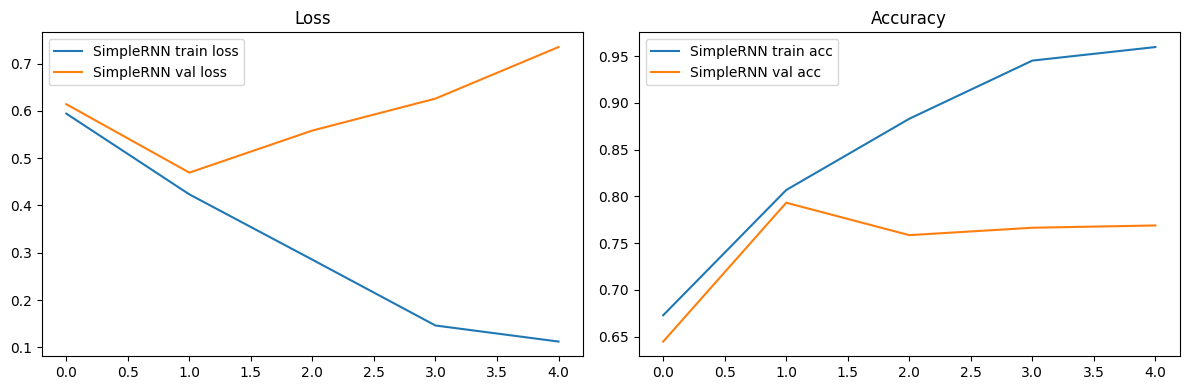

In [29]:
# 1.4. Визуализация результатов обучения SimpleRNN
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_simple_rnn.history['loss'], label='SimpleRNN train loss')
plt.plot(history_simple_rnn.history['val_loss'], label='SimpleRNN val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_simple_rnn.history['accuracy'], label='SimpleRNN train acc')
plt.plot(history_simple_rnn.history['val_accuracy'], label='SimpleRNN val acc')
plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('simple_rnn_training_results.png')

In [30]:
# 1.5. Сохранение модели SimpleRNN
simple_rnn_model.save('simple_rnn_model.h5')

print("\nОбучение, тестирование и сохранение модели SimpleRNN завершены!")


Обучение, тестирование и сохранение модели SimpleRNN завершены!


**2: Обучение LSTM**

In [31]:
# 2.1. Разработка архитектуры LSTM
def build_lstm():
    model = Sequential([
        Embedding(max_features, 128, input_length=maxlen),
        LSTM(64, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [33]:
# 2.2. Обучение модели LSTM
print("\nОбучение модели LSTM...")
lstm_model = build_lstm()
history_lstm = lstm_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                               validation_data=(x_test, y_test), verbose=1)


Обучение модели LSTM...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 327s 414ms/step - accuracy: 0.7270 - loss: 0.5346 - val_accuracy: 0.8663 - val_loss: 0.3312
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 339s 434ms/step - accuracy: 0.8921 - loss: 0.2752 - val_accuracy: 0.8467 - val_loss: 0.3622
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 341s 436ms/step - accuracy: 0.9207 - loss: 0.2109 - val_accuracy: 0.8705 - val_loss: 0.3188
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 436ms/step - accuracy: 0.9117 - loss: 0.2107 - val_accuracy: 0.8113 - val_loss: 0.4325
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 338s 433ms/step - accuracy: 0.9426 - loss: 0.1566 - val_accuracy: 0.8676 - val_loss: 0.3667


In [34]:
# 2.3. Тестирование модели LSTM
print("\nТестирование модели LSTM...")
y_pred_lstm = (lstm_model.predict(x_test) > 0.5).astype("int32")
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
print(f"Результаты LSTM:")
print(f"Accuracy: {accuracy_lstm:.4f}, F1-score: {f1_lstm:.4f}")


Тестирование модели LSTM...
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step
Результаты LSTM:
Accuracy: 0.8676, F1-score: 0.8713


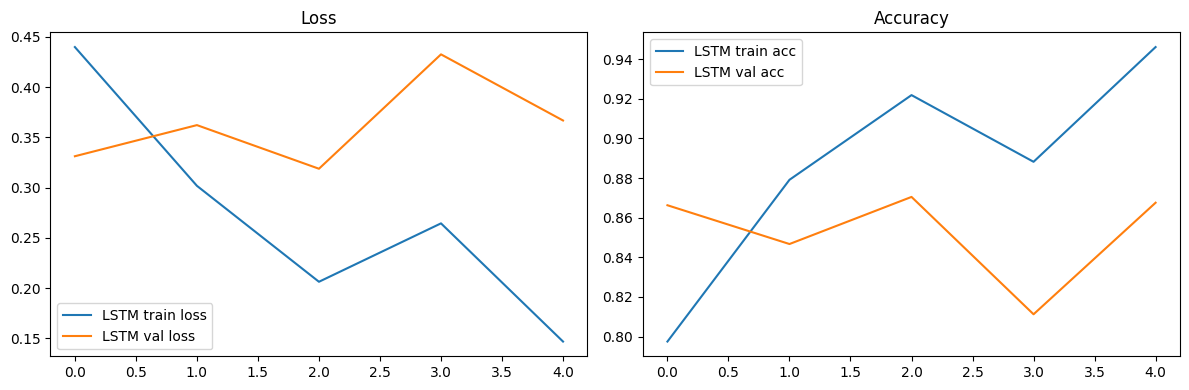

In [35]:
# 2.4. Визуализация результатов обучения LSTM
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM train loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='LSTM train acc')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM val acc')
plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('lstm_training_results.png')

In [36]:
# 2.5. Сохранение модели LSTM
lstm_model.save('lstm_model.h5')

print("\nОбучение, тестирование и сохранение модели LSTM завершены!")


Обучение, тестирование и сохранение модели LSTM завершены!


**3: Обучение GRU**

In [39]:
from tensorflow.keras.layers import Embedding, GRU, Dense  # Добавляем GRU

In [40]:
# 3.1. Разработка архитектуры GRU
def build_gru():
    model = Sequential([
        Embedding(max_features, 128, input_length=maxlen),
        GRU(64, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [41]:
# 3.2. Обучение модели GRU
print("\nОбучение модели GRU...")
gru_model = build_gru()
history_gru = gru_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                               validation_data=(x_test, y_test), verbose=1)


Обучение модели GRU...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 409s 518ms/step - accuracy: 0.7205 - loss: 0.5315 - val_accuracy: 0.8743 - val_loss: 0.3097
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 427s 500ms/step - accuracy: 0.9120 - loss: 0.2246 - val_accuracy: 0.8839 - val_loss: 0.2945
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 439s 496ms/step - accuracy: 0.9525 - loss: 0.1324 - val_accuracy: 0.8913 - val_loss: 0.3045
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 441s 495ms/step - accuracy: 0.9787 - loss: 0.0652 - val_accuracy: 0.8803 - val_loss: 0.3840
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 442s 495ms/step - accuracy: 0.9888 - loss: 0.0379 - val_accuracy: 0.8767 - val_loss: 0.4928


In [42]:
# 3.3. Тестирование модели GRU
print("\nТестирование модели GRU...")
y_pred_gru = (gru_model.predict(x_test) > 0.5).astype("int32")
accuracy_gru = accuracy_score(y_test, y_pred_gru)
f1_gru = f1_score(y_test, y_pred_gru)
print(f"Результаты GRU:")
print(f"Accuracy: {accuracy_gru:.4f}, F1-score: {f1_gru:.4f}")


Тестирование модели GRU...
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step
Результаты GRU:
Accuracy: 0.8767, F1-score: 0.8805


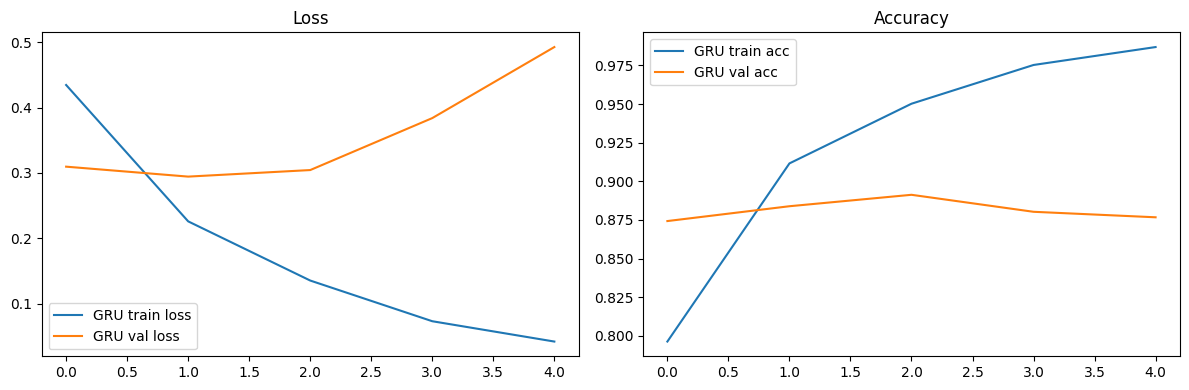

In [43]:
# 3.4. Визуализация результатов обучения GRU
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['loss'], label='GRU train loss')
plt.plot(history_gru.history['val_loss'], label='GRU val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_gru.history['accuracy'], label='GRU train acc')
plt.plot(history_gru.history['val_accuracy'], label='GRU val acc')
plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('gru_training_results.png')

In [44]:
# 3.5. Сохранение модели GRU
gru_model.save('gru_model.h5')

print("\nОбучение, тестирование и сохранение модели GRU завершены!")


Обучение, тестирование и сохранение модели GRU завершены!


**Оценка результатов:**

In [45]:
print("\nСводная таблица результатов:")
print("-" * 40)
print("{:<10} {:<10} {:<10}".format("Модель", "Accuracy", "F1-score"))
print("-" * 40)
print("{:<10} {:<10.4f} {:<10.4f}".format("SimpleRNN", accuracy_simple_rnn, f1_simple_rnn))
print("{:<10} {:<10.4f} {:<10.4f}".format("LSTM", accuracy_lstm, f1_lstm))
print("{:<10} {:<10.4f} {:<10.4f}".format("GRU", accuracy_gru, f1_gru))
print("-" * 40)


Сводная таблица результатов:
----------------------------------------
Модель     Accuracy   F1-score  
----------------------------------------
SimpleRNN  0.7690     0.7679    
LSTM       0.8676     0.8713    
GRU        0.8767     0.8805    
----------------------------------------
